In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

In [3]:
modern = pd.read_csv("modern_met_fe.csv")

In [4]:
modern.highlighted = modern.highlighted.apply(lambda x: 1 if x == True else 0)

In [5]:
modern.columns

Index(['highlighted', 'obj_year', 'department_drawings_and_prints',
       'department_european_paintings', 'department_modern_and_cont_art',
       'department_photographs', 'department_robert_lehman',
       'department_libraries', 'other_obj_name', 'obj_name_painting',
       'obj_name_photo', 'obj_name_print', 'obj_name_sculpture',
       'obj_name_watercolor', 'artist_role_author', 'artist_role_other',
       'artist_role_publisher', 'artist_nationality_bgdns',
       'artist_nationality_french', 'artist_nationality_italian',
       'artist_nationality_Other Nationality', 'medium_gelatin_silver_print',
       'medium_illustrated_book', 'medium_marble', 'medium_oil_on_canvas',
       'medium_oil_on_wood', 'medium_other', 'class_other', 'class_paintings',
       'class_photographs', 'class_prints', 'class_sculpture'],
      dtype='object')

## Pipeline

In [6]:
X, y = modern.iloc[:, 1:], modern.iloc[:, 0]

In [7]:
scaler = StandardScaler()
X['obj_year'] = scaler.fit_transform(X.loc[:, 'obj_year'].values.reshape(-1, 1))

In [10]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
poly_train_all = PolynomialFeatures(3)
new_features_train_all = poly_train_all.fit_transform(X_train_all.obj_year.values.reshape(-1, 1))
new_feature_names_train_all = poly_train_all.get_feature_names()
print(new_features_train_all.shape)
new_features_df_train_all = pd.DataFrame(new_features_train_all, columns = new_feature_names_train_all)
new_features_df_train_all.reset_index(drop=True, inplace=True)
X_train_all.reset_index(drop=True, inplace=True)

X_train_all = pd.concat([X_train_all, new_features_df_train_all], axis=1)

(172519, 4)


In [12]:
poly_test = PolynomialFeatures(3)
new_features_test = poly_test.fit_transform(X_test.obj_year.values.reshape(-1, 1))
new_feature_names_test = poly_test.get_feature_names()
print(new_features_test.shape)
new_features_df_test = pd.DataFrame(new_features_test, columns = new_feature_names_test)
new_features_df_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test, new_features_df_test], axis=1)

(43130, 4)


## Model training

In [13]:
lr_all = LogisticRegression(class_weight={1 : 4, 0 : 1}, C=0.1, solver='liblinear', max_iter=500000)
lr_all.fit(X_train_all, y_train_all)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 4}, max_iter=500000,
                   solver='liblinear')

In [14]:
%store -r data
threshold = data
threshold

0.5

In [15]:
y_predict_hard_test = (lr_all.predict_proba(X_test)[:,1] >= threshold).astype(bool)
test_precision = precision_score(y_test, y_predict_hard_test)
test_precision 

0.711864406779661

In [30]:
test_f1 = f1_score(y_test, y_predict_hard_test)
test_f1

0.3870967741935484

## Coefficients & Model Summary

In [16]:
X_train_all.columns

Index(['obj_year', 'department_drawings_and_prints',
       'department_european_paintings', 'department_modern_and_cont_art',
       'department_photographs', 'department_robert_lehman',
       'department_libraries', 'other_obj_name', 'obj_name_painting',
       'obj_name_photo', 'obj_name_print', 'obj_name_sculpture',
       'obj_name_watercolor', 'artist_role_author', 'artist_role_other',
       'artist_role_publisher', 'artist_nationality_bgdns',
       'artist_nationality_french', 'artist_nationality_italian',
       'artist_nationality_Other Nationality', 'medium_gelatin_silver_print',
       'medium_illustrated_book', 'medium_marble', 'medium_oil_on_canvas',
       'medium_oil_on_wood', 'medium_other', 'class_other', 'class_paintings',
       'class_photographs', 'class_prints', 'class_sculpture', '1', 'x0',
       'x0^2', 'x0^3'],
      dtype='object')

In [18]:
X_train_all.rename(columns={'obj_year': 'Object Year',
                       'department_drawings_and_prints': 'Drawing & Prints',
                       'department_european_paintings': 'European Paintings',
                       'department_modern_and_cont_art': 'Modern & Contemporary',
                       'department_photographs': 'Photography Dept',
                       'department_robert_lehman': "Robert Lehman Collection",
                       'department_libraries': "Libraries",
                       'other_obj_name' : "Other Object", 
                       'obj_name_painting' : "Painting",
                       'obj_name_photo' : "Photo", 
                       'obj_name_print' : "Print", 
                       'obj_name_sculpture' : "Sculpture",
                       'obj_name_watercolor' : "Watercolor", 
                       'artist_role_author' : "by Author", 
                       'artist_role_other' : "by other Artist Role",
                       'artist_role_publisher' : "by Publisher", 
                       'artist_nationality_bgdns' : "Artist: Greater Europe", #Artist: British/German/Dutch/Netherlandish/Spanish
                       'artist_nationality_french' : "Artist: French", 
                       'artist_nationality_italian' : "Artist: Italian",
                       'artist_nationality_Other Nationality' : "Artist: Other Nationality", 
                       'medium_gelatin_silver_print': "Gelatin Silver Print",
                       'medium_illustrated_book': "Illustrated Book", 
                       'medium_marble' : "Marble", 
                       'medium_oil_on_canvas': "Oil on Canvas",
                       'medium_oil_on_wood': "Oil on Wood", 
                       'medium_other': "Other Medium", 
                       'class_other' : "Other Classification", 
                       'class_paintings' : "Class of Paintings",
                       'class_photographs' : "Class of Photographs", 
                       'class_prints' : "Class of Prints", 
                       'class_sculpture': "Class of Sculpture", 
                        '1': "Polynomial Feature 1", 
                        'x0': "Polynomial Feature 2", 
                        'x0^2': "Polynomial Feature 3", 
                        'x0^3': "Polynomial Feature 4"}, inplace=True)
modern.columns

Index(['highlighted', 'obj_year', 'department_drawings_and_prints',
       'department_european_paintings', 'department_modern_and_cont_art',
       'department_photographs', 'department_robert_lehman',
       'department_libraries', 'other_obj_name', 'obj_name_painting',
       'obj_name_photo', 'obj_name_print', 'obj_name_sculpture',
       'obj_name_watercolor', 'artist_role_author', 'artist_role_other',
       'artist_role_publisher', 'artist_nationality_bgdns',
       'artist_nationality_french', 'artist_nationality_italian',
       'artist_nationality_Other Nationality', 'medium_gelatin_silver_print',
       'medium_illustrated_book', 'medium_marble', 'medium_oil_on_canvas',
       'medium_oil_on_wood', 'medium_other', 'class_other', 'class_paintings',
       'class_photographs', 'class_prints', 'class_sculpture'],
      dtype='object')

In [19]:
intercept = lr_all.intercept_[0]
intercept

-0.9337778269738236

In [20]:
coefs = lr_all.coef_
coefs = coefs[0]
coefs

array([-0.93799774, -2.46764762, -0.76511078, -0.32777704, -0.94005968,
        0.70662989,  6.11939381, -0.54822622,  0.8381047 ,  0.53015843,
       -0.88583057,  0.69327659,  0.46220052,  0.09366268, -0.41487699,
       -1.02662576,  0.76361559,  0.62142957,  0.32658601, -0.1792455 ,
       -0.57108494,  0.21668247,  0.80061767,  0.17803464, -0.84395244,
       -0.53490866, -0.13875801,  0.47603154,  0.03205742, -0.30587797,
        0.64454648, -0.93377783, -0.93799774, -0.7594572 ,  0.08410663])

In [21]:
coef_df = pd.DataFrame(data = coefs)
coef_df.columns = ["coef log-odds"]
coef_df["coef names"] = X_train_all.columns
coef_df["odds"] = coef_df['coef log-odds'].apply(lambda x: math.exp(x))
coef_df

,coef log-odds,coef names,odds
0,-0.937998,Object Year,0.391411
1,-2.467648,Drawing & Prints,0.084784
2,-0.765111,European Paintings,0.465282
3,-0.327777,Modern & Contemporary,0.720524
4,-0.940060,Photography Dept,0.390605
5,0.706630,Robert Lehman Collection,2.027148
6,6.119394,Libraries,454.589045
7,-0.548226,Other Object,0.577974
8,0.838105,Painting,2.311981
9,0.530158,Photo,1.699201


In [22]:
coef_df.columns

Index(['coef log-odds', 'coef names', 'odds'], dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


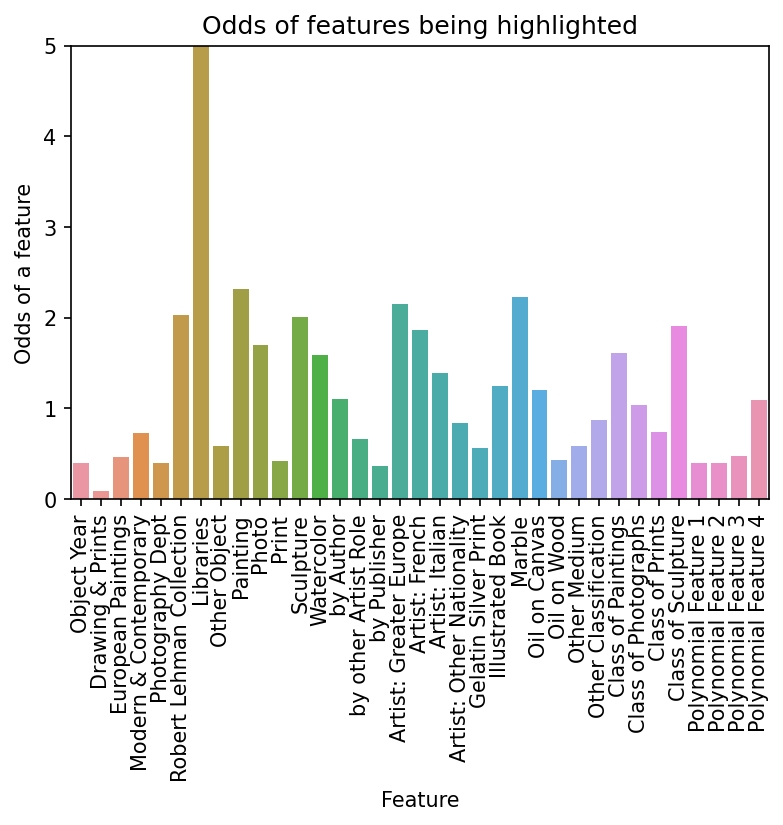

In [23]:
plt.figure(dpi=150)
g = sns.barplot(coef_df['coef names'], coef_df['odds'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylim([0, 5])
g.set(xlabel= "Feature", ylabel = "Odds of a feature")
g.set_title('Odds of features being highlighted')
g.figure.savefig("Odds of features being highlighted", bbox_inches='tight'); 

In [25]:
important_features = coef_df[coef_df.odds >1]
important_features

,coef log-odds,coef names,odds
5,0.706630,Robert Lehman Collection,2.027148
6,6.119394,Libraries,454.589045
8,0.838105,Painting,2.311981
9,0.530158,Photo,1.699201
11,0.693277,Sculpture,2.000259
12,0.462201,Watercolor,1.587564
13,0.093663,by Author,1.098189
16,0.763616,Artist: Greater Europe,2.146021
17,0.621430,Artist: French,1.861587
18,0.326586,Artist: Italian,1.386227


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


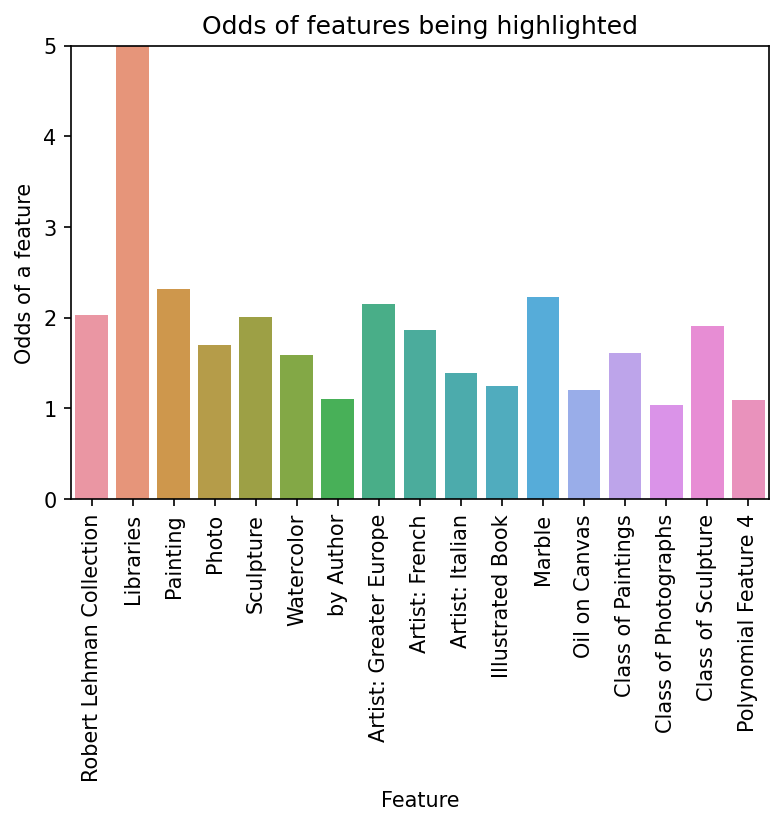

In [27]:
plt.figure(dpi=150)
g = sns.barplot(important_features['coef names'], important_features['odds'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylim([0, 5])
g.set(xlabel= "Feature", ylabel = "Odds of a feature")
g.set_title('Odds of features being highlighted')
g.figure.savefig("Odds of select features being highlighted", bbox_inches='tight'); 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


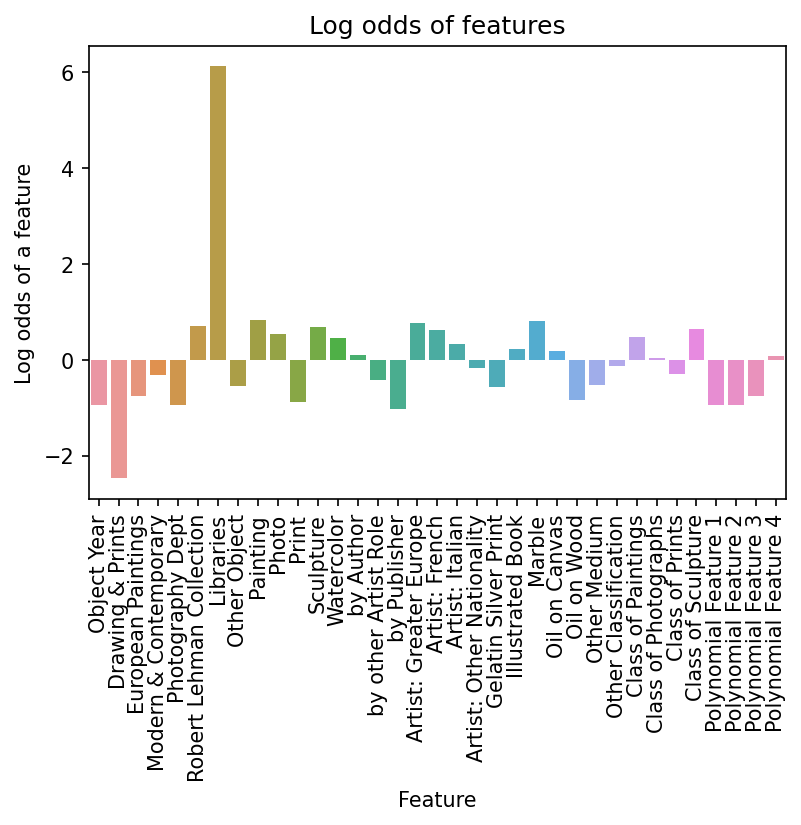

In [29]:
# for illustration only 
plt.figure(dpi=150)
g = sns.barplot(coef_df['coef names'], coef_df['coef log-odds'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(xlabel= "Feature", ylabel = "Log odds of a feature")
g.set_title('Log odds of features')
g.figure.savefig("Log odds of features", bbox_inches='tight'); 